In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns; sns.set()
from datetime import datetime
import calendar
import os
import psycopg2
import re
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.2f}'.format

data_dir = '../../data/'

data_raw_dir = '../../../data/'

In [93]:
df_resp_mobility = pd.read_csv(data_dir + 'transport/heatmap_2020.csv')


df_resp_mobility

/home/luizcelso/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


month  day     cod                                         name         latitude         longitude  nr_vehicles
0           7    5  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            1
1           6   29  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            4
2           7    3  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            3
3           7    1  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            4
4           7    2  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            3
...       ...  ...     ...                                          ...              ...               ...          ...
597358      6   22  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1
597359      6   18  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1
597360      6   17  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1
597361      6   14  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1
597362      6   16  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1

[597363 rows x 7 columns]

In [94]:
df_resp_mobility['Data'] = df_resp_mobility.apply(lambda x: "2020-{}-{}".format(x['month'], x['day']), axis=1)

df_resp_mobility['Data'] = pd.to_datetime(df_resp_mobility['Data'])

df_resp_mobility['weekday'] = df_resp_mobility['Data'].dt.weekday

df_resp_mobility

month  day     cod                                         name         latitude         longitude  nr_vehicles       Data  weekday
0           7    5  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            1 2020-07-05        6
1           6   29  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            4 2020-06-29        0
2           7    3  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            3 2020-07-03        4
3           7    1  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            4 2020-07-01        2
4           7    2  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack           -25.55            -49.26            3 2020-07-02        3
...       ...  ...     ...                                          ...              ...               ...          ...        ...      ...
597358      6   22  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1 2020-06-22        0
597359      6   18  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1 2020-06-18        3
597360      6   17  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1 2020-06-17        2
597361      6   14  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1 2020-06-14        6
597362      6   16  130052    Rua Edmundo Alberto Mercer,  604 - Tingui  -25,38262960232  -49,224420173698            1 2020-06-16        1

[597363 rows x 9 columns]

In [95]:
df_resp_mobility['Data'].astype(str)

0         2020-07-05
1         2020-06-29
2         2020-07-03
3         2020-07-01
4         2020-07-02
             ...    
597358    2020-06-22
597359    2020-06-18
597360    2020-06-17
597361    2020-06-14
597362    2020-06-16
Name: Data, Length: 597363, dtype: object

In [96]:
df_pontos = pd.read_csv(data_dir + 'transport/pontos-regionais-labels.csv')

df_pontos['NOME'] = df_pontos['NOME'].str.replace('ã', 'a')

df_pontos = df_pontos[['numero', 'NOME']]

df_pontos.columns = ['cod', 'Regional']

df_pontos

cod     Regional
0     106019  Bairro Novo
1     106101  Bairro Novo
2     106102  Bairro Novo
3     106103  Bairro Novo
4     106104  Bairro Novo
...      ...          ...
7031  660101          NaN
7032  660102          NaN
7033  660103          NaN
7034  660104          NaN
7035  660105          NaN

[7036 rows x 2 columns]

In [97]:
df_resp_mobility = df_resp_mobility.merge(df_pontos)

df_resp_mobility

month  day     cod                                               name          latitude         longitude  nr_vehicles       Data  weekday     Regional
0           7    5  160194        Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55            -49.26            1 2020-07-05        6  Bairro Novo
1           6   29  160194        Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55            -49.26            4 2020-06-29        0  Bairro Novo
2           7    3  160194        Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55            -49.26            3 2020-07-03        4  Bairro Novo
3           7    1  160194        Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55            -49.26            4 2020-07-01        2  Bairro Novo
4           7    2  160194        Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55            -49.26            3 2020-07-02        3  Bairro Novo
...       ...  ...     ...                                                ...               ...               ...          ...        ...      ...          ...
585221      6    8  102020              Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189   -49,27177777987            1 2020-06-08        0       Matriz
585222      6    4  102020              Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189   -49,27177777987            1 2020-06-04        3       Matriz
585223      6    3  102020              Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189   -49,27177777987            2 2020-06-03        2       Matriz
585224      7    6  105741  Terminal Pinheirinho - 684 - Rio Bonito (Semi ...   -25.51296766041  -49.295305305557            2 2020-07-06        0  Pinheirinho
585225      7    6  105741  Terminal Pinheirinho - 684 - Rio Bonito (Semi ...   -25,51296766041  -49,295305305557            2 2020-07-06        0  Pinheirinho

[585226 rows x 10 columns]

In [98]:
df_resp_mobility_baseline = pd.read_csv(data_dir + 'transport/heatmap_2019.csv')

df_resp_mobility_baseline['Data'] = df_resp_mobility_baseline.apply(lambda x: "2020-{}-{}".format(x['month'], x['day']), axis=1)

df_resp_mobility_baseline['Data'] = pd.to_datetime(df_resp_mobility_baseline['Data'])

df_resp_mobility_baseline['weekday'] = df_resp_mobility_baseline['Data'].dt.weekday

df_resp_mobility_baseline = df_resp_mobility_baseline.groupby(['cod', 'weekday']).mean()[['nr_vehicles']].reset_index().rename(columns={'nr_vehicles':'baseline'})

df_resp_mobility_baseline

cod  weekday  baseline
0      101001        0      2.41
1      101001        1      1.71
2      101001        2      3.00
3      101001        3      3.00
4      101001        4      3.00
...       ...      ...       ...
41073  660105        2      1.21
41074  660105        3      1.00
41075  660105        4      1.40
41076  660105        5      1.11
41077  660105        6      1.27

[41078 rows x 3 columns]

In [99]:
df_resp_mobility = df_resp_mobility.merge(df_resp_mobility_baseline)

df_resp_mobility

month  day     cod                                         name          latitude        longitude  nr_vehicles       Data  weekday     Regional  baseline
0           7    5  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-07-05        6  Bairro Novo      2.00
1           6   28  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-06-28        6  Bairro Novo      2.00
2           6   21  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            2 2020-06-21        6  Bairro Novo      2.00
3           6   14  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            2 2020-06-14        6  Bairro Novo      2.00
4           6    7  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-06-07        6  Bairro Novo      2.00
...       ...  ...     ...                                          ...               ...              ...          ...        ...      ...          ...       ...
576054      6    8  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-08        0       Matriz      2.00
576055      6   27  102020        Praca Rui Barbosa - 468 - Jd Centauro  -25.435289023189  -49.27177777987            1 2020-06-27        5       Matriz      3.00
576056      6   27  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-27        5       Matriz      3.00
576057      6   19  102020        Praca Rui Barbosa - 468 - Jd Centauro  -25.435289023189  -49.27177777987            1 2020-06-19        4       Matriz      2.80
576058      6   19  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-19        4       Matriz      2.80

[576059 rows x 11 columns]

In [100]:
df_resp_mobility['volume'] = df_resp_mobility['nr_vehicles']/df_resp_mobility['baseline']

df_resp_mobility

month  day     cod                                         name          latitude        longitude  nr_vehicles       Data  weekday     Regional  baseline  volume
0           7    5  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-07-05        6  Bairro Novo      2.00    0.50
1           6   28  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-06-28        6  Bairro Novo      2.00    0.50
2           6   21  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            2 2020-06-21        6  Bairro Novo      2.00    1.00
3           6   14  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            2 2020-06-14        6  Bairro Novo      2.00    1.00
4           6    7  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-06-07        6  Bairro Novo      2.00    0.50
...       ...  ...     ...                                          ...               ...              ...          ...        ...      ...          ...       ...     ...
576054      6    8  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-08        0       Matriz      2.00    0.50
576055      6   27  102020        Praca Rui Barbosa - 468 - Jd Centauro  -25.435289023189  -49.27177777987            1 2020-06-27        5       Matriz      3.00    0.33
576056      6   27  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-27        5       Matriz      3.00    0.33
576057      6   19  102020        Praca Rui Barbosa - 468 - Jd Centauro  -25.435289023189  -49.27177777987            1 2020-06-19        4       Matriz      2.80    0.36
576058      6   19  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-19        4       Matriz      2.80    0.36

[576059 rows x 12 columns]

In [101]:
df_mob_pr = df_resp_mobility.groupby(['Regional', 'Data'])[['volume']].mean().reset_index()

df_mob_pr['Regional'] = df_mob_pr['Regional'].str.title()

df_mob_pr

Regional       Data  volume
0          Bairro Novo 2020-03-01    0.62
1          Bairro Novo 2020-03-02    1.64
2          Bairro Novo 2020-03-03    1.00
3          Bairro Novo 2020-03-05    0.37
4          Bairro Novo 2020-03-07    0.63
5          Bairro Novo 2020-03-08    0.69
6          Bairro Novo 2020-03-14    0.75
7          Bairro Novo 2020-03-17    1.52
8          Bairro Novo 2020-03-18    0.95
9          Bairro Novo 2020-03-19    0.97
10         Bairro Novo 2020-03-20    1.18
11         Bairro Novo 2020-03-21    0.61
12         Bairro Novo 2020-03-22    0.64
13         Bairro Novo 2020-03-23    1.41
14         Bairro Novo 2020-03-25    0.52
15         Bairro Novo 2020-03-26    0.55
16         Bairro Novo 2020-03-27    0.73
17         Bairro Novo 2020-03-28    0.56
18         Bairro Novo 2020-03-29    0.68
19         Bairro Novo 2020-03-30    1.06
20         Bairro Novo 2020-03-31    1.20
21         Bairro Novo 2020-04-01    0.43
22         Bairro Novo 2020-04-02    0.42
23         Bairro Novo 2020-04-03    0.40
24         Bairro Novo 2020-04-04    0.64
25         Bairro Novo 2020-04-05    0.66
26         Bairro Novo 2020-04-06    1.05
27         Bairro Novo 2020-04-07    0.99
28         Bairro Novo 2020-04-08    0.64
29         Bairro Novo 2020-04-09    0.78
30         Bairro Novo 2020-04-10    0.63
31         Bairro Novo 2020-04-11    0.63
32         Bairro Novo 2020-04-12    0.78
33         Bairro Novo 2020-04-13    1.26
34         Bairro Novo 2020-04-14    0.94
35         Bairro Novo 2020-04-15    0.68
36         Bairro Novo 2020-04-16    0.67
37         Bairro Novo 2020-04-17    0.67
38         Bairro Novo 2020-04-18    0.66
39         Bairro Novo 2020-04-19    0.78
40         Bairro Novo 2020-04-20    1.15
41         Bairro Novo 2020-04-21    0.98
42         Bairro Novo 2020-04-22    0.76
43         Bairro Novo 2020-04-23    0.62
44         Bairro Novo 2020-04-24    0.93
45         Bairro Novo 2020-04-25    0.62
46         Bairro Novo 2020-04-26    0.67
47         Bairro Novo 2020-05-02    0.33
48         Bairro Novo 2020-05-03    0.51
49         Bairro Novo 2020-05-04    1.32
50         Bairro Novo 2020-05-05    1.35
51         Bairro Novo 2020-05-06    0.99
52         Bairro Novo 2020-05-07    0.44
53         Bairro Novo 2020-05-08    0.68
54         Bairro Novo 2020-05-09    0.64
55         Bairro Novo 2020-05-10    0.62
56         Bairro Novo 2020-05-11    1.54
57         Bairro Novo 2020-05-14    0.81
58         Bairro Novo 2020-05-16    0.66
59         Bairro Novo 2020-05-17    0.67
60         Bairro Novo 2020-05-18    1.30
61         Bairro Novo 2020-05-20    0.62
62         Bairro Novo 2020-05-21    0.76
63         Bairro Novo 2020-05-22    0.90
64         Bairro Novo 2020-05-23    0.59
65         Bairro Novo 2020-05-24    0.70
66         Bairro Novo 2020-05-25    1.45
67         Bairro Novo 2020-05-26    0.83
68         Bairro Novo 2020-05-29    0.83
69         Bairro Novo 2020-05-30    0.61
70         Bairro Novo 2020-05-31    0.76
71         Bairro Novo 2020-06-01    1.02
72         Bairro Novo 2020-06-03    0.71
73         Bairro Novo 2020-06-04    0.74
74         Bairro Novo 2020-06-05    0.87
75         Bairro Novo 2020-06-06    0.70
76         Bairro Novo 2020-06-07    0.68
77         Bairro Novo 2020-06-08    1.45
78         Bairro Novo 2020-06-10    0.92
79         Bairro Novo 2020-06-11    0.63
80         Bairro Novo 2020-06-12    1.01
81         Bairro Novo 2020-06-13    0.56
82         Bairro Novo 2020-06-14    0.80
83         Bairro Novo 2020-06-15    1.34
84         Bairro Novo 2020-06-16    1.19
85         Bairro Novo 2020-06-17    0.97
86         Bairro Novo 2020-06-18    0.86
87         Bairro Novo 2020-06-19    0.87
88         Bairro Novo 2020-06-20    0.62
89         Bairro Novo 2020-06-21    0.72
90         Bairro Novo 2020-06-22    1.16
91         Bairro Novo 2020-06-23    1.31
92         Bairro Novo 2020-06-24    0.85
93         Bairro Novo 2020-06-25    0.85
94         Bairro Novo 2

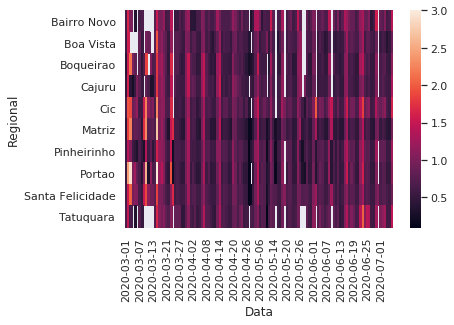

In [102]:
df_mob_hm = df_mob_pr

df_mob_hm['Data'] = df_mob_hm['Data'].astype(str)

df_mob_hm = df_mob_pr.pivot(index='Regional', columns='Data', values='volume')

sns.heatmap(df_mob_hm)

In [103]:
df_resp_mobility

month  day     cod                                         name          latitude        longitude  nr_vehicles       Data  weekday     Regional  baseline  volume
0           7    5  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-07-05        6  Bairro Novo      2.00    0.50
1           6   28  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-06-28        6  Bairro Novo      2.00    0.50
2           6   21  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            2 2020-06-21        6  Bairro Novo      2.00    1.00
3           6   14  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            2 2020-06-14        6  Bairro Novo      2.00    1.00
4           6    7  160194  Rua Hussein Ibrahim Omairy, 262 - Osternack            -25.55           -49.26            1 2020-06-07        6  Bairro Novo      2.00    0.50
...       ...  ...     ...                                          ...               ...              ...          ...        ...      ...          ...       ...     ...
576054      6    8  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-08        0       Matriz      2.00    0.50
576055      6   27  102020        Praca Rui Barbosa - 468 - Jd Centauro  -25.435289023189  -49.27177777987            1 2020-06-27        5       Matriz      3.00    0.33
576056      6   27  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-27        5       Matriz      3.00    0.33
576057      6   19  102020        Praca Rui Barbosa - 468 - Jd Centauro  -25.435289023189  -49.27177777987            1 2020-06-19        4       Matriz      2.80    0.36
576058      6   19  102020        Praça Rui Barbosa - 468 - Jd Centauro  -25,435289023189  -49,27177777987            1 2020-06-19        4       Matriz      2.80    0.36

[576059 rows x 12 columns]

In [104]:
# cols = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']
# labels = ['Comércio e entretenimento', 'Mercados e farmácias', 'Parques', 'Estações', 'Trabalho', 'Residencial']

# df_mob_pr = df_resp_mobility.query("sub_region_1 == 'State of Paraná'")[['Data'] + cols]

# df_mob_pr.columns = ['Data'] + labels

# df_mob_pr

In [105]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

    

def get_crosscorr_df(df, s1, s2, lags):
    rs = [crosscorr(df[s1],df[s2], lag) for lag in lags]

    return pd.DataFrame({'Offset':lags, 'Pearson r':rs}).set_index('Offset')

def get_crosscorr_plot(df_lcorr):
    offset = df_lcorr['Pearson r'].abs().idxmax()
    f,ax=plt.subplots(figsize=(10,3))
    ax.plot(df_lcorr)
    ax.axvline(0,color='k',linestyle='--',label='Center')
    ax.axvline(offset,color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Max offset = {offset}', xlabel='Offset',ylabel='Pearson r')
    # ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    # ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
    plt.legend()
    return plt

def get_series_plot(df, s1, s2, lag = 0):
    df = df.copy()
    
    df[s2] = df[s2].shift(lag)
#     f,ax=plt.subplots(figsize=(10,3))
    ax = df[[s1,s2]].plot()
    ax.set(title=f'Lag = {lag}')
    return plt

lags = range(-28,1)


In [106]:

df_reg = pd.read_csv(data_dir + 'epidemic/regionais-cwb/cases_interp.csv')#, parse_dates=['Data'])

df_reg['Regional'] = df_reg['Regional'].str.title()

df_reg

Regional        Data    Casos  Obitos  CasosNovos  ObitosNovos
0         Bairro Novo  2020-05-15    36.00     nan         nan          nan
1         Bairro Novo  2020-05-16    37.31     nan        1.31          nan
2         Bairro Novo  2020-05-17    38.61     nan        1.30          nan
3         Bairro Novo  2020-05-18    39.91     nan        1.29          nan
4         Bairro Novo  2020-05-19    41.19     nan        1.29          nan
5         Bairro Novo  2020-05-20    42.47     nan        1.28          nan
6         Bairro Novo  2020-05-21    43.74     nan        1.27          nan
7         Bairro Novo  2020-05-22    45.00     nan        1.26          nan
8         Bairro Novo  2020-05-23    46.25     nan        1.25          nan
9         Bairro Novo  2020-05-24    47.49     nan        1.24          nan
10        Bairro Novo  2020-05-25    48.73     nan        1.23          nan
11        Bairro Novo  2020-05-26    50.00     nan        1.28          nan
12        Bairro Novo  2020-05-27    51.62     nan        1.61          nan
13        Bairro Novo  2020-05-28    53.61     nan        2.00          nan
14        Bairro Novo  2020-05-29    56.00     nan        2.39          nan
15        Bairro Novo  2020-05-30    58.77     nan        2.77          nan
16        Bairro Novo  2020-05-31    61.93     nan        3.16          nan
17        Bairro Novo  2020-06-01    65.47     nan        3.54          nan
18        Bairro Novo  2020-06-02    69.42     nan        3.94          nan
19        Bairro Novo  2020-06-03    73.81     nan        4.40          nan
20        Bairro Novo  2020-06-04    78.67     nan        4.86          nan
21        Bairro Novo  2020-06-05    84.00     nan        5.33          nan
22        Bairro Novo  2020-06-06    89.79     nan        5.79          nan
23        Bairro Novo  2020-06-07    96.05     nan        6.26          nan
24        Bairro Novo  2020-06-08   102.77     nan        6.72          nan
25        Bairro Novo  2020-06-09   109.75     nan        6.98          nan
26        Bairro Novo  2020-06-10   115.72     nan        5.97          nan
27        Bairro Novo  2020-06-11   120.47     nan        4.75          nan
28        Bairro Novo  2020-06-12   124.00    8.00        3.53          nan
29        Bairro Novo  2020-06-13   126.32    8.18        2.32         0.18
30        Bairro Novo  2020-06-14   127.41    8.34        1.10         0.17
31        Bairro Novo  2020-06-15   127.29    8.50       -0.12         0.15
32        Bairro Novo  2020-06-16   126.68    8.64       -0.62         0.14
33        Bairro Novo  2020-06-17   129.90    8.77        3.22         0.13
34        Bairro Novo  2020-06-18   137.67    8.89        7.77         0.12
35        Bairro Novo  2020-06-19   150.00    9.00       12.33         0.11
36        Bairro Novo  2020-06-20   166.88    9.10       16.88         0.10
37        Bairro Novo  2020-06-21   188.33    9.18       21.44         0.08
38        Bairro Novo  2020-06-22   214.32    9.25       26.00         0.07
39        Bairro Novo  2020-06-23   244.35    9.31       30.02         0.05
40        Bairro Novo  2020-06-24   275.23    9.29       30.88        -0.02
41        Bairro Novo  2020-06-25   306.45    9.18       31.22        -0.10
42        Bairro Novo  2020-06-26   338.00    9.00       31.55        -0.18
43        Bairro Novo  2020-06-27   369.88    8.73       31.88        -0.27
44        Bairro Novo  2020-06-28   402.10    8.38       32.22        -0.35
45        Bairro Novo  2020-06-29   434.65    7.95       32.55        -0.43
46        Bairro Novo  2020-06-30   467.52    7.52       32.86        -0.44
47        Bairro Novo  2020-07-01   500.54    7.51       33.02        -0.01
48        Bairro Novo  2020-07-02   533.70    8.00       33.16         0.49
49        Bairro Novo  2020-07-03   567.00    9.00       33.30         1.00
50        Bairro Novo  2020-07-04   600.44   10.50       33.44         1.50
51        Bairro Novo  2020-07-05   634.01   12.51       33.5

In [107]:
df_mob_pr

Regional        Data  volume
0          Bairro Novo  2020-03-01    0.62
1          Bairro Novo  2020-03-02    1.64
2          Bairro Novo  2020-03-03    1.00
3          Bairro Novo  2020-03-05    0.37
4          Bairro Novo  2020-03-07    0.63
5          Bairro Novo  2020-03-08    0.69
6          Bairro Novo  2020-03-14    0.75
7          Bairro Novo  2020-03-17    1.52
8          Bairro Novo  2020-03-18    0.95
9          Bairro Novo  2020-03-19    0.97
10         Bairro Novo  2020-03-20    1.18
11         Bairro Novo  2020-03-21    0.61
12         Bairro Novo  2020-03-22    0.64
13         Bairro Novo  2020-03-23    1.41
14         Bairro Novo  2020-03-25    0.52
15         Bairro Novo  2020-03-26    0.55
16         Bairro Novo  2020-03-27    0.73
17         Bairro Novo  2020-03-28    0.56
18         Bairro Novo  2020-03-29    0.68
19         Bairro Novo  2020-03-30    1.06
20         Bairro Novo  2020-03-31    1.20
21         Bairro Novo  2020-04-01    0.43
22         Bairro Novo  2020-04-02    0.42
23         Bairro Novo  2020-04-03    0.40
24         Bairro Novo  2020-04-04    0.64
25         Bairro Novo  2020-04-05    0.66
26         Bairro Novo  2020-04-06    1.05
27         Bairro Novo  2020-04-07    0.99
28         Bairro Novo  2020-04-08    0.64
29         Bairro Novo  2020-04-09    0.78
30         Bairro Novo  2020-04-10    0.63
31         Bairro Novo  2020-04-11    0.63
32         Bairro Novo  2020-04-12    0.78
33         Bairro Novo  2020-04-13    1.26
34         Bairro Novo  2020-04-14    0.94
35         Bairro Novo  2020-04-15    0.68
36         Bairro Novo  2020-04-16    0.67
37         Bairro Novo  2020-04-17    0.67
38         Bairro Novo  2020-04-18    0.66
39         Bairro Novo  2020-04-19    0.78
40         Bairro Novo  2020-04-20    1.15
41         Bairro Novo  2020-04-21    0.98
42         Bairro Novo  2020-04-22    0.76
43         Bairro Novo  2020-04-23    0.62
44         Bairro Novo  2020-04-24    0.93
45         Bairro Novo  2020-04-25    0.62
46         Bairro Novo  2020-04-26    0.67
47         Bairro Novo  2020-05-02    0.33
48         Bairro Novo  2020-05-03    0.51
49         Bairro Novo  2020-05-04    1.32
50         Bairro Novo  2020-05-05    1.35
51         Bairro Novo  2020-05-06    0.99
52         Bairro Novo  2020-05-07    0.44
53         Bairro Novo  2020-05-08    0.68
54         Bairro Novo  2020-05-09    0.64
55         Bairro Novo  2020-05-10    0.62
56         Bairro Novo  2020-05-11    1.54
57         Bairro Novo  2020-05-14    0.81
58         Bairro Novo  2020-05-16    0.66
59         Bairro Novo  2020-05-17    0.67
60         Bairro Novo  2020-05-18    1.30
61         Bairro Novo  2020-05-20    0.62
62         Bairro Novo  2020-05-21    0.76
63         Bairro Novo  2020-05-22    0.90
64         Bairro Novo  2020-05-23    0.59
65         Bairro Novo  2020-05-24    0.70
66         Bairro Novo  2020-05-25    1.45
67         Bairro Novo  2020-05-26    0.83
68         Bairro Novo  2020-05-29    0.83
69         Bairro Novo  2020-05-30    0.61
70         Bairro Novo  2020-05-31    0.76
71         Bairro Novo  2020-06-01    1.02
72         Bairro Novo  2020-06-03    0.71
73         Bairro Novo  2020-06-04    0.74
74         Bairro Novo  2020-06-05    0.87
75         Bairro Novo  2020-06-06    0.70
76         Bairro Novo  2020-06-07    0.68
77         Bairro Novo  2020-06-08    1.45
78         Bairro Novo  2020-06-10    0.92
79         Bairro Novo  2020-06-11    0.63
80         Bairro Novo  2020-06-12    1.01
81         Bairro Novo  2020-06-13    0.56
82         Bairro Novo  2020-06-14    0.80
83         Bairro Novo  2020-06-15    1.34
84         Bairro Novo  2020-06-16    1.19
85         Bairro Novo  2020-06-17    0.97
86         Bairro Novo  2020-06-18    0.86
87         Bairro Novo  2020-06-19    0.87
88         Bairro Novo  2020-06-20    0.62
89         Bairro Novo  2020-06-21    0.72
90         Bairro Novo  2020-06-22    1.16
91         Bairro Novo  2020-06-23    1.31
92         Bair

In [108]:
df_series = df_reg.merge(df_mob_pr)

df_series

Regional        Data    Casos  Obitos  CasosNovos  ObitosNovos  volume
0         Bairro Novo  2020-05-16    37.31     nan        1.31          nan    0.66
1         Bairro Novo  2020-05-17    38.61     nan        1.30          nan    0.67
2         Bairro Novo  2020-05-18    39.91     nan        1.29          nan    1.30
3         Bairro Novo  2020-05-20    42.47     nan        1.28          nan    0.62
4         Bairro Novo  2020-05-21    43.74     nan        1.27          nan    0.76
5         Bairro Novo  2020-05-22    45.00     nan        1.26          nan    0.90
6         Bairro Novo  2020-05-23    46.25     nan        1.25          nan    0.59
7         Bairro Novo  2020-05-24    47.49     nan        1.24          nan    0.70
8         Bairro Novo  2020-05-25    48.73     nan        1.23          nan    1.45
9         Bairro Novo  2020-05-26    50.00     nan        1.28          nan    0.83
10        Bairro Novo  2020-05-29    56.00     nan        2.39          nan    0.83
11        Bairro Novo  2020-05-30    58.77     nan        2.77          nan    0.61
12        Bairro Novo  2020-05-31    61.93     nan        3.16          nan    0.76
13        Bairro Novo  2020-06-01    65.47     nan        3.54          nan    1.02
14        Bairro Novo  2020-06-03    73.81     nan        4.40          nan    0.71
15        Bairro Novo  2020-06-04    78.67     nan        4.86          nan    0.74
16        Bairro Novo  2020-06-05    84.00     nan        5.33          nan    0.87
17        Bairro Novo  2020-06-06    89.79     nan        5.79          nan    0.70
18        Bairro Novo  2020-06-07    96.05     nan        6.26          nan    0.68
19        Bairro Novo  2020-06-08   102.77     nan        6.72          nan    1.45
20        Bairro Novo  2020-06-10   115.72     nan        5.97          nan    0.92
21        Bairro Novo  2020-06-11   120.47     nan        4.75          nan    0.63
22        Bairro Novo  2020-06-12   124.00    8.00        3.53          nan    1.01
23        Bairro Novo  2020-06-13   126.32    8.18        2.32         0.18    0.56
24        Bairro Novo  2020-06-14   127.41    8.34        1.10         0.17    0.80
25        Bairro Novo  2020-06-15   127.29    8.50       -0.12         0.15    1.34
26        Bairro Novo  2020-06-16   126.68    8.64       -0.62         0.14    1.19
27        Bairro Novo  2020-06-17   129.90    8.77        3.22         0.13    0.97
28        Bairro Novo  2020-06-18   137.67    8.89        7.77         0.12    0.86
29        Bairro Novo  2020-06-19   150.00    9.00       12.33         0.11    0.87
30        Bairro Novo  2020-06-20   166.88    9.10       16.88         0.10    0.62
31        Bairro Novo  2020-06-21   188.33    9.18       21.44         0.08    0.72
32        Bairro Novo  2020-06-22   214.32    9.25       26.00         0.07    1.16
33        Bairro Novo  2020-06-23   244.35    9.31       30.02         0.05    1.31
34        Bairro Novo  2020-06-24   275.23    9.29       30.88        -0.02    0.85
35        Bairro Novo  2020-06-25   306.45    9.18       31.22        -0.10    0.85
36        Bairro Novo  2020-06-26   338.00    9.00       31.55        -0.18    1.03
37        Bairro Novo  2020-06-27   369.88    8.73       31.88        -0.27    0.45
38        Bairro Novo  2020-06-28   402.10    8.38       32.22        -0.35    0.62
39        Bairro Novo  2020-06-29   434.65    7.95       32.55        -0.43    1.56
40        Bairro Novo  2020-07-01   500.54    7.51       33.02        -0.01    0.84
41        Bairro Novo  2020-07-02   533.70    8.00       33.16         0.49    0.75
42        Bairro Novo  2020-07-03   567.00    9.00       33.30         1.00    1.04
43        Bairro Novo  2020-07-04   600.44   10.50       33.44         1.50    0.60
44        Bairro Novo  2020-07-05   634.01   12.51       33.58         2.01    0.67
45        Bairro Novo  2020-07-06   667.73   15.02       33.71         2.51    1.43
46          Boa Vista  2020-05-16    93.99     nan        1.99   

In [109]:
#parei aqui. precisamos de mais dados

reg = 'Bairro Novo'

df = df_reg.query("Regional == @reg")

df = df.merge(df_mob_pr)

df

Regional        Data  Casos  Obitos  CasosNovos  ObitosNovos  volume
0   Bairro Novo  2020-05-16  37.31     nan        1.31          nan    0.66
1   Bairro Novo  2020-05-17  38.61     nan        1.30          nan    0.67
2   Bairro Novo  2020-05-18  39.91     nan        1.29          nan    1.30
3   Bairro Novo  2020-05-20  42.47     nan        1.28          nan    0.62
4   Bairro Novo  2020-05-21  43.74     nan        1.27          nan    0.76
5   Bairro Novo  2020-05-22  45.00     nan        1.26          nan    0.90
6   Bairro Novo  2020-05-23  46.25     nan        1.25          nan    0.59
7   Bairro Novo  2020-05-24  47.49     nan        1.24          nan    0.70
8   Bairro Novo  2020-05-25  48.73     nan        1.23          nan    1.45
9   Bairro Novo  2020-05-26  50.00     nan        1.28          nan    0.83
10  Bairro Novo  2020-05-29  56.00     nan        2.39          nan    0.83
11  Bairro Novo  2020-05-30  58.77     nan        2.77          nan    0.61
12  Bairro Novo  2020-05-31  61.93     nan        3.16          nan    0.76
13  Bairro Novo  2020-06-01  65.47     nan        3.54          nan    1.02
14  Bairro Novo  2020-06-03  73.81     nan        4.40          nan    0.71
15  Bairro Novo  2020-06-04  78.67     nan        4.86          nan    0.74
16  Bairro Novo  2020-06-05  84.00     nan        5.33          nan    0.87
17  Bairro Novo  2020-06-06  89.79     nan        5.79          nan    0.70
18  Bairro Novo  2020-06-07  96.05     nan        6.26          nan    0.68
19  Bairro Novo  2020-06-08 102.77     nan        6.72          nan    1.45
20  Bairro Novo  2020-06-10 115.72     nan        5.97          nan    0.92
21  Bairro Novo  2020-06-11 120.47     nan        4.75          nan    0.63
22  Bairro Novo  2020-06-12 124.00    8.00        3.53          nan    1.01
23  Bairro Novo  2020-06-13 126.32    8.18        2.32         0.18    0.56
24  Bairro Novo  2020-06-14 127.41    8.34        1.10         0.17    0.80
25  Bairro Novo  2020-06-15 127.29    8.50       -0.12         0.15    1.34
26  Bairro Novo  2020-06-16 126.68    8.64       -0.62         0.14    1.19
27  Bairro Novo  2020-06-17 129.90    8.77        3.22         0.13    0.97
28  Bairro Novo  2020-06-18 137.67    8.89        7.77         0.12    0.86
29  Bairro Novo  2020-06-19 150.00    9.00       12.33         0.11    0.87
30  Bairro Novo  2020-06-20 166.88    9.10       16.88         0.10    0.62
31  Bairro Novo  2020-06-21 188.33    9.18       21.44         0.08    0.72
32  Bairro Novo  2020-06-22 214.32    9.25       26.00         0.07    1.16
33  Bairro Novo  2020-06-23 244.35    9.31       30.02         0.05    1.31
34  Bairro Novo  2020-06-24 275.23    9.29       30.88        -0.02    0.85
35  Bairro Novo  2020-06-25 306.45    9.18       31.22        -0.10    0.85
36  Bairro Novo  2020-06-26 338.00    9.00       31.55        -0.18    1.03
37  Bairro Novo  2020-06-27 369.88    8.73       31.88        -0.27    0.45
38  Bairro Novo  2020-06-28 402.10    8.38       32.22        -0.35    0.62
39  Bairro Novo  2020-06-29 434.65    7.95       32.55        -0.43    1.56
40  Bairro Novo  2020-07-01 500.54    7.51       33.02        -0.01    0.84
41  Bairro Novo  2020-07-02 533.70    8.00       33.16         0.49    0.75
42  Bairro Novo  2020-07-03 567.00    9.00       33.30         1.00    1.04
43  Bairro Novo  2020-07-04 600.44   10.50       33.44         1.50    0.60
44  Bairro Novo  2020-07-05 634.01   12.51       33.58         2.01    0.67
45  Bairro Novo  2020-07-06 667.73   15.02       33.71         2.51    1.43

In [110]:
df_lcorr = get_crosscorr_df(df, 'volume', 'CasosNovos', lags)

df_lcorr

Pearson r
Offset           
-28          0.05
-27          0.02
-26          0.12
-25          0.13
-24          0.07
-23          0.08
-22          0.03
-21          0.02
-20          0.09
-19          0.12
-18          0.12
-17          0.14
-16          0.16
-15          0.15
-14          0.14
-13          0.18
-12          0.23
-11          0.23
-10          0.21
-9           0.23
-8           0.15
-7           0.09
-6           0.16
-5           0.14
-4           0.11
-3           0.12
-2           0.07
-1           0.02
 0           0.09

In [111]:

df_corrs = pd.DataFrame(index=lags)

df_corrs

Empty DataFrame
Columns: []
Index: [-28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]

In [112]:
def get_corrs(df_reg, df_mob_pr, var):
    df_corrs = pd.DataFrame(index=lags)
    regs = df_reg['Regional'].unique()

    for reg in regs:
        print(reg)
        df = df_reg.query("Regional == @reg")
        df = df.merge(df_mob_pr)
        df_lcorr = get_crosscorr_df(df, var, 'CasosNovos', lags)
        df_lcorr.columns = [reg]
        df_corrs = df_corrs.join(df_lcorr)
    return df_corrs

df_corrs = get_corrs(df_reg, df_mob_pr, 'volume')

df_corrs

Bairro Novo
Boa Vista
Boqueirao
Cajuru
Cic
Matriz
Pinheirinho
Portao
Santa Felicidade
Tatuquara


Bairro Novo  Boa Vista  Boqueirao  Cajuru  Cic  Matriz  Pinheirinho  Portao  Santa Felicidade  Tatuquara
-28         0.05       0.10      -0.08   -0.22 0.05    0.15        -0.02   -0.04             -0.12       0.08
-27         0.02       0.10      -0.11   -0.19 0.18    0.20         0.09   -0.01              0.04      -0.02
-26         0.12       0.20       0.10   -0.01 0.14    0.16         0.01   -0.07              0.08       0.01
-25         0.13       0.18       0.12   -0.07 0.11    0.14         0.04   -0.05              0.08       0.08
-24         0.07       0.11       0.05   -0.10 0.15    0.12         0.00   -0.05              0.11       0.01
-23         0.08       0.04       0.00   -0.14 0.12    0.09         0.05    0.01              0.09       0.12
-22         0.03      -0.06      -0.08   -0.23 0.10    0.05         0.02    0.03              0.09      -0.07
-21         0.02      -0.15      -0.13   -0.31 0.18    0.07         0.02    0.08              0.14      -0.15
-20         0.09      -0.15      -0.04   -0.17 0.31    0.13         0.18    0.19              0.17       0.17
-19         0.12      -0.07       0.07   -0.03 0.28    0.11         0.31    0.29              0.12       0.48
-18         0.12      -0.14       0.02   -0.07 0.25    0.09         0.34    0.28              0.08       0.45
-17         0.14      -0.17       0.01   -0.09 0.22    0.07         0.34    0.29              0.03       0.49
-16         0.16      -0.19      -0.00   -0.11 0.13    0.03         0.35    0.27             -0.05       0.44
-15         0.15      -0.21      -0.03   -0.16 0.04   -0.01         0.29    0.22             -0.13       0.25
-14         0.14      -0.21      -0.07   -0.20 0.08    0.02         0.22    0.15             -0.09       0.09
-13         0.18      -0.10       0.07   -0.08 0.20    0.09         0.28    0.17              0.01       0.26
-12         0.23       0.08       0.22    0.08 0.16    0.07         0.37    0.24             -0.01       0.48
-11         0.23       0.11       0.23    0.09 0.16    0.07         0.37    0.24             -0.00       0.46
-10         0.21       0.18       0.21    0.07 0.19    0.07         0.36    0.27              0.00       0.52
-9          0.23       0.25       0.20    0.07 0.12    0.05         0.36    0.29             -0.01       0.55
-8          0.15       0.27       0.15    0.01 0.08    0.03         0.31    0.29             -0.03       0.39
-7          0.09       0.27       0.09   -0.04 0.16    0.07         0.27    0.29              0.01       0.23
-6          0.16       0.31       0.16    0.04 0.18    0.12         0.33    0.33              0.08       0.27
-5          0.14       0.27       0.14    0.03 0.19    0.12         0.32    0.32              0.09       0.29
-4          0.11       0.24       0.14    0.04 0.20    0.13         0.31    0.30              0.09       0.34
-3          0.12       0.20       0.15    0.02 0.23    0.13         0.29    0.27              0.09       0.43
-2          0.07       0.11       0.11   -0.01 0.17    0.11         0.22    0.22              0.05       0.38
-1          0.02       0.05       0.06   -0.05 0.10    0.09         0.16    0.17              0.02       0.34
0           0.09       0.07       0.13    0.11 0.19    0.10         0.19    0.15              0.03       0.45

Bairro Novo
Boa Vista
Boqueirao
Cajuru
Cic
Matriz
Pinheirinho
Portao
Santa Felicidade
Tatuquara
******volume*******
Bairro Novo        0.23
Boa Vista          0.31
Boqueirao          0.23
Cajuru             0.11
Cic                0.31
Matriz             0.20
Pinheirinho        0.37
Portao             0.33
Santa Felicidade   0.17
Tatuquara          0.55
dtype: float64
Bairro Novo        -12
Boa Vista           -6
Boqueirao          -11
Cajuru               0
Cic                -20
Matriz             -27
Pinheirinho        -12
Portao              -6
Santa Felicidade   -20
Tatuquara           -9
dtype: int64


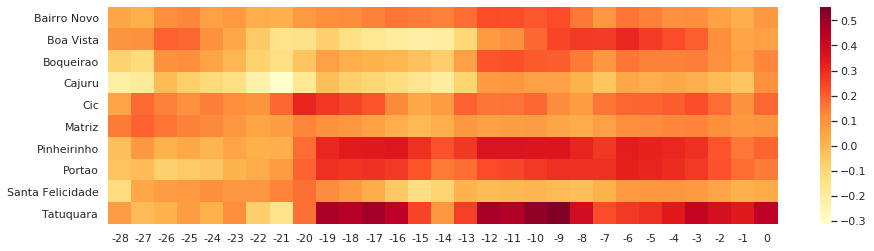

{'volume': (0.5544024400411379, 0.30077123139086515, 0.10929997863058058)}


In [114]:
var_max = {}

labels = ['volume']
for var in labels:
    df_corrs = get_corrs(df_reg, df_mob_pr, var)
    print("******{}*******".format(var))
    print(df_corrs.max())
    print(df_corrs.idxmax())
    var_max[var] = (df_corrs.abs().max().max(), df_corrs.abs().max().mean(), df_corrs.abs().max().std())
    plt.figure(figsize=(15,4))

    sns.heatmap(df_corrs.T, cmap='YlOrRd')
    plt.show()
print(var_max)   



In [ ]:
df_corrs.idxmax()

In [ ]:
plt.figure(figsize=(15,4))

sns.heatmap(df_corrs.T, cmap='YlOrRd')